### Import modules and libraries for use

In [1]:
import nltk
import urllib
import pandas as pd
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import os
import re
from sklearn.manifold import TSNE
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import gensim
import string
from gensim import corpora
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
pride = urllib.request.urlopen('https://www.gutenberg.org/files/1342/1342-0.txt').read()
pride_lines = pride.decode('utf8')

In [3]:
def find_chapters(book):
    chapters = {}
    i = 0
    b = 0
    for x in range(1, 62):
        i = book.find("Chapter", + b)
        b = book.find("Chapter", i + 1)
        chapters['Chapter {}'.format(x)] = book[i:b]
    return chapters

In [4]:
stop = stopwords.words('english') + ['mr',
                                     'mrs',
                                     'miss', 
                                     'say',
                                     'have', 
                                     'might',
                                     'thought',
                                     'would', 
                                     'could', 
                                     'make', 
                                     'much',
                                     'dear',
                                     'must',
                                     'know',
                                     'one',
                                     'good',
                                     'every',
                                     'towards',
                                     'give',
                                     'come',
                                     'go',
                                     'elizabeth', 
                                     'darcy', 
                                     'bingley', 
                                     'catherine',
                                     'mrbennet', 
                                     'mrsbennet', 
                                     'lydia',
                                     'wickham',
                                     'caroline',
                                     'jane',
                                     'collins',
                                     'charlotte',
                                     'kitty',
                                     'mary',
                                     'fitzwilliam',
                                     'mrgardiner',
                                     'mrsgardiner',
                                     'georgiana',
                                     'well',
                                     'see',
                                     'think',
                                     'though',
                                     'never',
                                     'always',
                                     'although',
                                     'may',
                                     'soon',
                                     'wish',
                                     'take',
                                     'great',
                                     'nothing',
                                     'something',
                                     'young',
                                     'look',
                                     'even',
                                     'cannot',
                                     'many',
                                     'few',
                                     'even',
                                     'however',
                                     'like',
                                     'lucas'
                                     'ever',
                                     'feel',
                                     'shall',
                                     'hope',
                                     'sure',
                                     'yes',
                                     'no',
                                     'oh',
                                     'two',
                                     'three',
                                     'first',
                                     'second',
                                     'third',
                                     'with',
                                     'without',
                                     'use',
                                     'quite']

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'
    
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    try:
        tag = get_wordnet_pos(nltk.pos_tag([word])[0][1])
        return lemmatizer.lemmatize(word, pos=tag)
    except:
        pass

In [5]:
def all_sentences(corpus,
                  include_stop=True):
    vocab = []
    
    text = corpus.replace('Fitzwilliam Darcy','Darcy')\
                 .replace('Fitzwilliam', 'Darcy')\
                 .replace('Lizzy','Elizabeth')\
                 .replace('LIZZY','Elizabeth')\
                 .replace('Mrs. Collins', 'Charlotte')\
                 .replace('Charlotte Lucas', 'Charlotte')\
                 .replace('Mr. Bennet', 'MrBennet')\
                 .replace('Mrs. Bennet', 'MrsBennet')\
                 .replace('Mr. Gardiner', 'MrGardiner')\
                 .replace('Mrs. Gardiner', 'MrsGardiner')\
    
    for line in sent_tokenize(text):
        line= re.sub('[%s]|Chapter' % re.escape(string.punctuation), '', line)
        line = re.sub('[^a-zA-Z\ ]', '', line)
        line = line.lower()
        line = line.split()
        if include_stop:
            line = [lemmatize_word(x) for x in line if lemmatize_word(x) not in stop]
        else:
            line = [lemmatize_word(x) for x in line]
        vocab.append(line)
    return vocab

### Function to get word frequencies

In [6]:
def get_frequecies(corpus):
    dictionary = corpora.Dictionary(corpus)
    # You can check the mapping by caling 'token2id' attribute.
    id_map = dictionary.token2id
    count_map = dictionary.dfs
    word_count = {}
    for word, id_ in id_map.items():
        word_count[word] = count_map[id_]
    sorted_corpus = sorted([(x,y) 
                           for x,y in word_count.items()], 
                           key=lambda x: x[1], reverse=True)
    return sorted_corpus

### Top Keywords in Full Corpus

In [7]:
full_corpus = all_sentences(pride_lines[2229:-19175])
frequencies = get_frequecies(full_corpus)
frequencies

[('sister', 286),
 ('lady', 252),
 ('time', 217),
 ('little', 182),
 ('day', 159),
 ('friend', 158),
 ('family', 156),
 ('man', 145),
 ('manner', 137),
 ('reply', 132),
 ('mother', 132),
 ('daughter', 131),
 ('father', 129),
 ('believe', 128),
 ('ever', 127),
 ('last', 122),
 ('letter', 121),
 ('walk', 119),
 ('room', 117),
 ('u', 116),
 ('long', 115),
 ('away', 115),
 ('talk', 110),
 ('house', 109),
 ('return', 108),
 ('bennet', 108),
 ('receive', 108),
 ('seem', 106),
 ('way', 104),
 ('answer', 102),
 ('enough', 101),
 ('saw', 99),
 ('love', 96),
 ('felt', 96),
 ('pleasure', 95),
 ('cry', 94),
 ('attention', 94),
 ('subject', 93),
 ('speak', 93),
 ('indeed', 92),
 ('till', 91),
 ('mean', 90),
 ('add', 90),
 ('begin', 88),
 ('really', 88),
 ('longbourn', 88),
 ('often', 87),
 ('suppose', 87),
 ('feeling', 85),
 ('place', 85),
 ('call', 85),
 ('ask', 85),
 ('heard', 84),
 ('get', 83),
 ('part', 83),
 ('expect', 83),
 ('want', 82),
 ('aunt', 81),
 ('morning', 80),
 ('turn', 80),
 ('mome

### Total Unique Words

In [8]:
len(frequencies)

4971

In [22]:
full_corpus2 = all_sentences(pride_lines[2229:-19175], include_stop=False)
frequencies2 = get_frequecies(full_corpus2)
samples = list(dict(frequencies2).keys())
freqs = list(dict(frequencies2).values())

df_words = pd.DataFrame()
df_words['frequency'] = freqs
df_words['word'] = samples

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = np.log(df_words['frequency']), x = np.log(df_words.index + 1)))

fig.update_layout(go.Layout(
    title='Word Rank vs Word Frequency in Pride and Prejudice<br>by Jane Austen<br><sub>Including Stop Words</sub>',
    width=500,
    height=500,
    xaxis=dict(
        title='Log Rank' 
    ),
    yaxis=dict(
        title='Log Frequency', tickfont=dict(size=7)
    )
))
fig.show()

### Top Keywords in Each Chapter

In [9]:
text = find_chapters(pride_lines[2229:-19175])
for chapter in ['Chapter {}'.format(x) for x in range(1, 62)]:
    corpus = all_sentences(text[chapter])
    print('{}'.format(chapter), get_frequecies(corpus)[:5])

Chapter 1 [('visit', 5), ('man', 4), ('single', 4), ('wife', 4), ('girl', 4)]
Chapter 2 [('visit', 4), ('acquaintance', 4), ('till', 3), ('wife', 3), ('long', 3)]
Chapter 3 [('dance', 14), ('lady', 8), ('room', 8), ('sister', 7), ('handsome', 6)]
Chapter 4 [('sister', 5), ('people', 4), ('house', 4), ('man', 3), ('character', 3)]
Chapter 5 [('lucas', 7), ('seem', 4), ('believe', 4), ('pride', 4), ('bennet', 3)]
Chapter 6 [('dance', 10), ('sir', 8), ('lucas', 7), ('lady', 6), ('sister', 6)]
Chapter 7 [('mother', 7), ('meryton', 7), ('father', 6), ('officer', 6), ('sister', 5)]
Chapter 8 [('sister', 14), ('lady', 7), ('accomplish', 7), ('bennet', 6), ('hurst', 5)]
Chapter 9 [('country', 9), ('mother', 8), ('sister', 5), ('girl', 5), ('netherfield', 5)]
Chapter 10 [('letter', 8), ('write', 8), ('friend', 6), ('hurst', 5), ('cry', 5)]
Chapter 11 [('laugh', 6), ('hurst', 6), ('book', 6), ('conversation', 5), ('room', 5)]
Chapter 12 [('netherfield', 4), ('carriage', 3), ('day', 3), ('morning

### Get edgelist from text characters and chapters

In [10]:
edge_list = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 62)]:
    text[chapter] = text[chapter].replace('Fitzwilliam Darcy','Darcy')\
                                 .replace('Fitzwilliam', 'Darcy')\
                                 .replace('Lizzy','Elizabeth')\
                                 .replace('Mrs. Collins', 'Charlotte')\
                                 .replace('Mr. Bennet', 'MrBennet')\
                                 .replace('Mrs. Bennet', 'MrsBennet')\
                                 .replace('Mr. Gardiner', 'MrGardiner')\
                                 .replace('Mrs. Gardiner', 'MrsGardiner')
    for name in ['Elizabeth', 
                 'Darcy', 
                 'Bingley', 
                 'Catherine',
                 'MrBennet', 
                 'MrsBennet',
                 'Lydia',
                 'Wickham',
                 'Caroline',
                 'Jane',
                 'Collins',
                 'Charlotte',
                 'Kitty',
                 'Mary',
                 'Maria',
                 'MrGardiner',
                 'MrsGardiner',
                 'Georgiana']:
        print(chapter, name, len(re.findall(name, text[chapter])))
        edge_list.append((chapter, name, len(re.findall(name, text[chapter]))))

data_df = pd.DataFrame(edge_list)
data_df.columns = ['Chapter', 'Character', 'Weight']
data_df = data_df[data_df['Weight']>0]

Chapter 1 Elizabeth 3
Chapter 1 Darcy 0
Chapter 1 Bingley 4
Chapter 1 Catherine 0
Chapter 1 MrBennet 6
Chapter 1 MrsBennet 0
Chapter 1 Lydia 1
Chapter 1 Wickham 0
Chapter 1 Caroline 0
Chapter 1 Jane 1
Chapter 1 Collins 0
Chapter 1 Charlotte 0
Chapter 1 Kitty 0
Chapter 1 Mary 0
Chapter 1 Maria 0
Chapter 1 MrGardiner 0
Chapter 1 MrsGardiner 0
Chapter 1 Georgiana 0
Chapter 2 Elizabeth 3
Chapter 2 Darcy 0
Chapter 2 Bingley 7
Chapter 2 Catherine 0
Chapter 2 MrBennet 5
Chapter 2 MrsBennet 3
Chapter 2 Lydia 2
Chapter 2 Wickham 0
Chapter 2 Caroline 0
Chapter 2 Jane 0
Chapter 2 Collins 0
Chapter 2 Charlotte 0
Chapter 2 Kitty 4
Chapter 2 Mary 3
Chapter 2 Maria 0
Chapter 2 MrGardiner 0
Chapter 2 MrsGardiner 0
Chapter 2 Georgiana 0
Chapter 3 Elizabeth 6
Chapter 3 Darcy 7
Chapter 3 Bingley 16
Chapter 3 Catherine 1
Chapter 3 MrBennet 4
Chapter 3 MrsBennet 6
Chapter 3 Lydia 1
Chapter 3 Wickham 0
Chapter 3 Caroline 0
Chapter 3 Jane 5
Chapter 3 Collins 0
Chapter 3 Charlotte 0
Chapter 3 Kitty 0
Chapter 

Chapter 43 Bingley 2
Chapter 43 Catherine 0
Chapter 43 MrBennet 0
Chapter 43 MrsBennet 0
Chapter 43 Lydia 0
Chapter 43 Wickham 7
Chapter 43 Caroline 0
Chapter 43 Jane 0
Chapter 43 Collins 0
Chapter 43 Charlotte 0
Chapter 43 Kitty 0
Chapter 43 Mary 0
Chapter 43 Maria 0
Chapter 43 MrGardiner 5
Chapter 43 MrsGardiner 10
Chapter 43 Georgiana 0
Chapter 44 Elizabeth 14
Chapter 44 Darcy 17
Chapter 44 Bingley 6
Chapter 44 Catherine 0
Chapter 44 MrBennet 0
Chapter 44 MrsBennet 0
Chapter 44 Lydia 0
Chapter 44 Wickham 1
Chapter 44 Caroline 0
Chapter 44 Jane 2
Chapter 44 Collins 0
Chapter 44 Charlotte 0
Chapter 44 Kitty 0
Chapter 44 Mary 0
Chapter 44 Maria 0
Chapter 44 MrGardiner 1
Chapter 44 MrsGardiner 4
Chapter 44 Georgiana 1
Chapter 45 Elizabeth 18
Chapter 45 Darcy 17
Chapter 45 Bingley 14
Chapter 45 Catherine 0
Chapter 45 MrBennet 0
Chapter 45 MrsBennet 0
Chapter 45 Lydia 0
Chapter 45 Wickham 2
Chapter 45 Caroline 0
Chapter 45 Jane 0
Chapter 45 Collins 0
Chapter 45 Charlotte 0
Chapter 45 Kitt

### Build graph

In [11]:
B = nx.Graph()

B.add_nodes_from(data_df['Chapter'],
                 bipartite=0)
B.add_nodes_from(data_df['Character'],
                 bipartite=1)

B.add_weighted_edges_from(
    [(row['Chapter'], 
      row['Character'],
      row['Weight']) for idx, row in data_df.iterrows()])

### Get character projection

In [12]:
character_filter = {n for n, d in B.nodes(data=True) if d['bipartite']==1}

# project bipartite graph onto character nodes keeping number of co-occurences, weighted degree
B_character = nx.bipartite.weighted_projected_graph(B, character_filter)

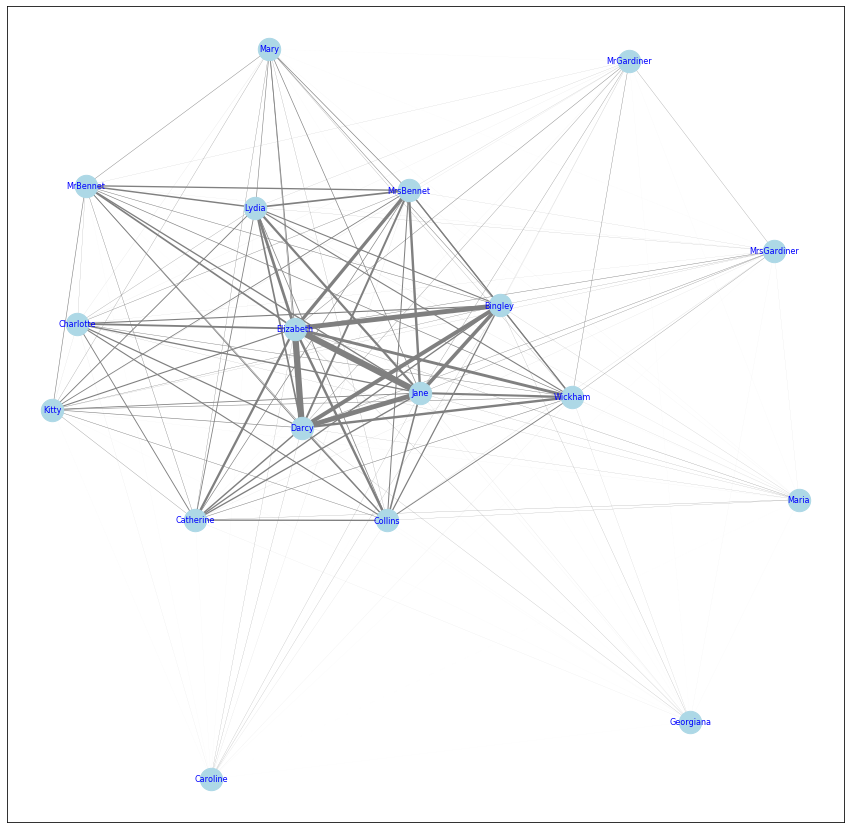

In [14]:
plt.figure(figsize=(15,15));
pos = nx.spring_layout(B_character, iterations = 50);
edges = B_character.edges()
weights = [(B_character[u][v]['weight']/20)**2 for u,v in edges]
nx.draw_networkx_nodes(B_character, pos, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character, pos,  edge_color='gray', width=weights);
nx.draw_networkx_labels(B_character, pos, font_size=8, font_color ='blue');

### Character degree centrality

In [34]:
char_deg_cent = {k:v for k,v in dict(nx.degree_centrality(B)).items()}
print('Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

Character Degree Centrality 
-----------------------------------------------
Elizabeth - Degree Centrality: 0.782
Jane - Degree Centrality: 0.641
Darcy - Degree Centrality: 0.641
Bingley - Degree Centrality: 0.564
MrsBennet - Degree Centrality: 0.462


### Character betweenness centrality

In [35]:
b_bet_cent = {k:v for k,v in dict(nx.betweenness_centrality(B)).items()}
print('Character Betweenness Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in b_bet_cent.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Betweenness Centrality:',round(cdegree,3))

Character Betweenness Centrality 
-----------------------------------------------
Elizabeth - Betweenness Centrality: 0.195
Darcy - Betweenness Centrality: 0.112
Jane - Betweenness Centrality: 0.107
Bingley - Betweenness Centrality: 0.087
MrsBennet - Betweenness Centrality: 0.05


### Create function for NMF and LDA Topic Modeling

In [14]:
def NMF_LDA(text):
    maxdf = .4
    mindf = 5
    no_top_words = 10
    no_topics = 3

    tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1, 1),
                                        max_df=maxdf, 
                                        min_df=mindf, 
                                        stop_words=stop)
    tfidf1 = tfidf_vectorizer1.fit_transform(text)
    tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()

    ct_vectorizer1 = CountVectorizer(ngram_range=(1, 1),
        max_df=maxdf, min_df=mindf, stop_words=stop)
    ct1 = ct_vectorizer1.fit_transform(text)
    tf_feature_names1 = ct_vectorizer1.get_feature_names()

    # Run NMF
    nmf1 = NMF(n_components=no_topics,
               max_iter=300)
    nmf1.fit_transform(tfidf1)

    # Run LDA
    lda1 = LatentDirichletAllocation(n_components=no_topics, 
                                     max_iter=10,
                                     learning_method='online', 
                                     learning_offset=50.,
                                     random_state=0).fit(ct1)
    def display_topics(model, feature_names, no_top_words, model_used):
        topic_dict={}
        for topic_idx, topic in enumerate(model.components_):
            topic_dict["Topic:{}".format(topic_idx+1)]=" ".join(set([feature_names[i].title()
            for i in topic.argsort()[:-no_top_words - 1:-1]]))
        return pd.DataFrame.from_dict(topic_dict,
                                      orient='index')\
                                      .reset_index()\
                                      .rename(columns={'index':'Topic',
                                                       0:'Top Words'})
    
    return display_topics(nmf1, 
                          tfidf_feature_names1, 
                          no_top_words, 
                          "NMF"),\
           display_topics(lda1, 
                          tf_feature_names1, 
                          no_top_words, "LDA")

### Turn lists back into sentences

In [15]:
topic_corpus =  [' '.join(x) for x in full_corpus]

### Get NMF and LDA topics

In [16]:
NMF_LDA_Tuple = NMF_LDA(topic_corpus)

### NMF topics

In [17]:
NMF_LDA_Tuple[0]['Top Words'].tolist()

['Time Letter Away Long Lady Walk Little Last Day Daughter',
 'Mother Wedding Pleasure Answer Compliment Write Sister Join Account Help',
 'Believe Love Friend Mean Indeed Reply Ever Man Really Cry']

### LDA topics

In [18]:
NMF_LDA_Tuple[1]['Top Words'].tolist()

['Expect Mother Want Way Believe Friend Turn Sister Man Moment',
 'Speak Time Letter Write Lady Room Walk Reply Day Seem',
 'House Father Saw Pleasure Receive Sister Felt Little Ever Family']

### Plot W2V with TSNE

In [19]:
def W2V(nlp_list):
    
    model = gensim.models.Word2Vec(nlp_list,
                                   size=100,
                                   window=10,
                                   min_count=3,
                                   workers=2)


    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity=30, 
                      n_components=2, 
                      init='pca', 
                      n_iter=250, 
                      angle=.8)
    
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    df = pd.DataFrame([x, y, labels]).T
    df.columns = ['x','y','label']
        
    return df

In [20]:
full_corpus = all_sentences(pride_lines[2229:-19175], include_stop=False)
w2v_df = W2V(full_corpus)

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [23]:
character_list = ['Elizabeth', 
                  'Darcy', 
                  'Bingley', 
                  'Catherine',
                  'MrBennet', 
                  'MrsBennet',
                  'Lydia',
                  'Wickham',
                  'Caroline',
                  'Jane',
                  'Collins',
                  'Charlotte',
                  'Kitty',
                  'Mary',
                  'Maria',
                  'Fitzwilliam',
                  'MrGardiner',
                  'MrsGardiner',
                  'Georgiana']

character_list = [x.lower() for x in character_list]

df = w2v_df[w2v_df['label'].isin(character_list)]


text_pos = [x for x in np.random.choice(['top left', 
                                         'bottom left',
                                         'top right',
                                         'bottom right'], 
                                          len(df),
                                          p=[.2,.3,.3,.2])]


trace = go.Scatter(x=df['x'],
                   y=df['y'],
                   mode='markers+text', 
                   textposition=text_pos,
                   text=df['label'],
                   textfont=dict(size=8),
                   hoverinfo='text')



fig = go.Figure([trace])

fig.update_layout(go.Layout(
    title='Word2Vec Name Vector Similarity',
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=800
)
